In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
sns.set(style='ticks', color_codes=True)
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['figure.dpi'] = 150

boston = load_boston()

/home/harsh/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/harsh/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/bost

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
df=pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
#MEDEV is missing from the Boston.data, beacuse it is ij Boston.target
df['MEDV']=boston.target

<AxesSubplot:>

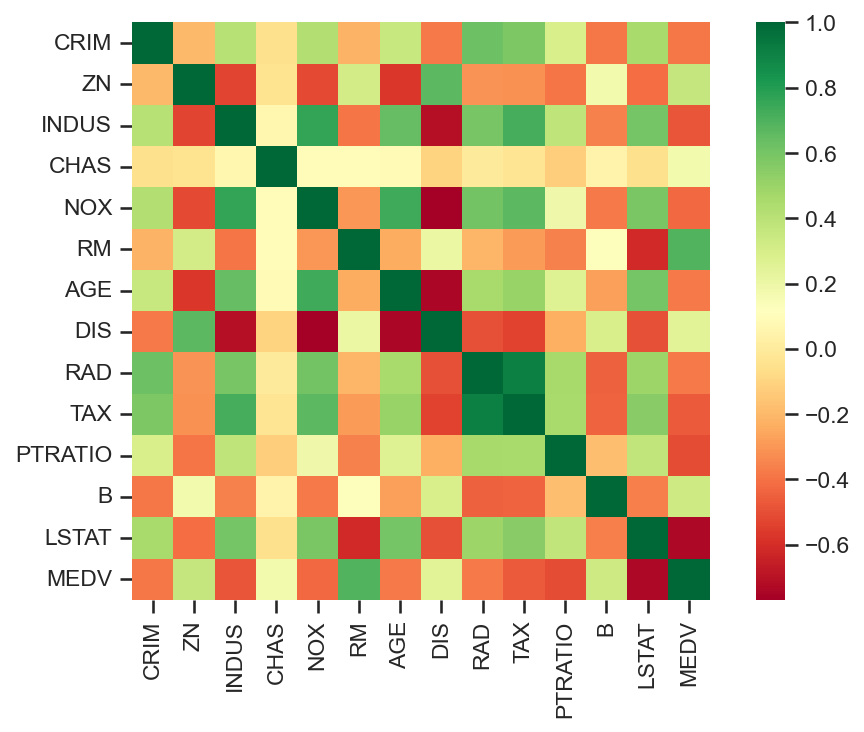

In [10]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

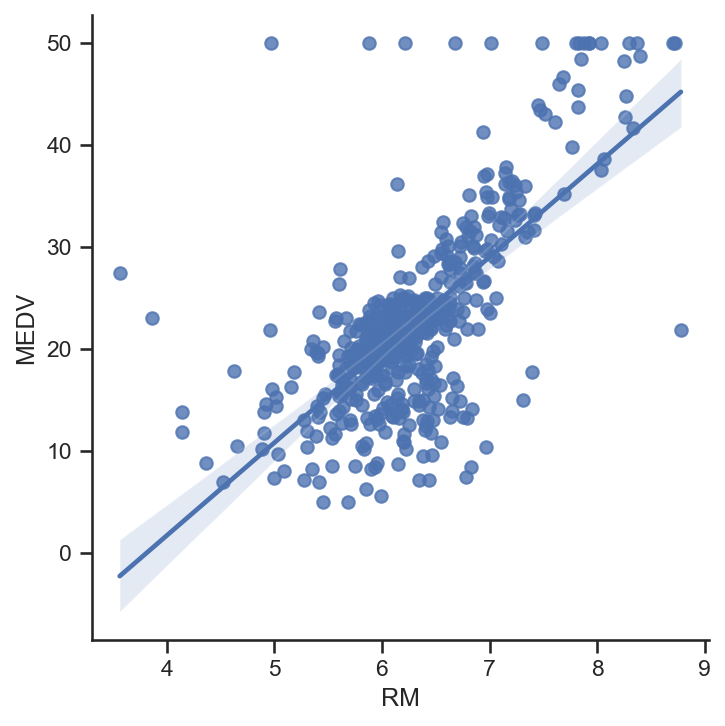

In [11]:
sns.lmplot(x='RM', y='MEDV', data=df)

In [12]:
#simple linear Regression
X=df['RM']
y=df['MEDV']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
#fitting the model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train.values.reshape(-1,1), y_train)

LinearRegression()

In [16]:
regressor.coef_

array([9.03907314])

In [17]:
#check prediction score- R^2 value
regressor.score(X_test.values.reshape(-1,1), y_test)

0.4834590168919488

In [19]:
#prediction
y_pred=regressor.predict(X_test.values.reshape(-1, 1))

In [21]:
evaluate=pd.DataFrame({'Actual':y_test.values.flatten(), 'Predicted':y_pred.flatten()})
evaluate.head()

,Actual,Predicted
0,23.6,23.772341
1,32.4,26.863704
2,13.6,19.858422
3,22.8,20.599626
4,16.1,22.696691


<AxesSubplot:>

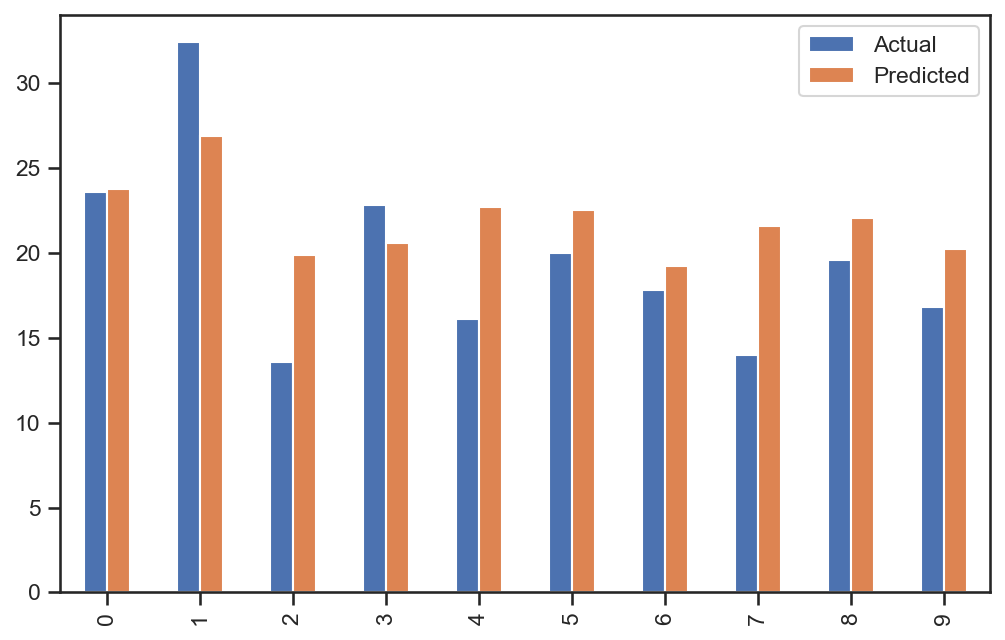

In [22]:
evaluate.head(10).plot(kind='bar')

In [24]:
#multiple regression

X=df[['LSTAT','INDUS','CRIM','NOX','TAX','PTRATIO','CHAS','ZN','DIS']]
y=df['MEDV']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
regressor.fit(X_train, y_train)
regressor.score(X_test, y_test)

0.6553355003203649

In [27]:
y_pred=regressor.predict(X_test)
evaluate=pd.DataFrame({'Actual':y_test.values.flatten(), 'Predicted':y_pred.flatten()})
evaluate.head()

,Actual,Predicted
0,23.6,29.870800
1,32.4,37.907034
2,13.6,17.462955
3,22.8,26.596642
4,16.1,16.048974
